In [1]:
from bs4 import BeautifulSoup
from urllib2 import urlopen, HTTPError, URLError
from urlparse import urlparse, urljoin
import os.path, errno
import shutil
import subprocess32 as subprocess
from concurrent.futures import *
from itertools import islice

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
cd ~/MEGA/eScienceWork/projects/OOIVideos/OOIVideos

/home/val/MEGA/eScienceWork/projects/OOIVideos/OOIVideos


In [4]:
# gd_url = 'https://drive.google.com/folderview?id=0Bxkqjvq_AAi_bVU0bDFocFl0SG8&usp=sharing'

In [5]:
import imageio

In [6]:
filename = 'opendap_hyrax_large_format_RS03ASHS-PN03B-06-CAMHDA301_2016_01_01_CAMHDA301-20160101T210000Z.mp4'

<IPython.core.display.Javascript object>


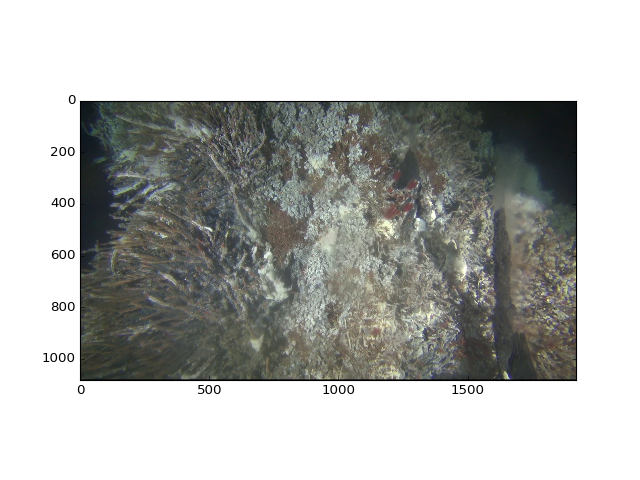

In [7]:
vid = imageio.get_reader(filename,  'ffmpeg')
nums = [2760,8160,13200]
for num in nums:
    image = vid.get_data(num)
    plt.imshow(image)
    plt.show()
    

In [9]:
len(vid)

25200

In [10]:
# Frames per second
25200/(14*60)

30

In [11]:
# 7:20
(7*60+20)*30

13200

In [12]:
# 4:32
(4*60+32)*30

8160

In [13]:
#1:42
(1*60+32)*30

2760

In [14]:
np.arange(0,24,3)

array([ 0,  3,  6,  9, 12, 15, 18, 21])

In [15]:
date = '2016_01_01'
import imageio
import time

### Processing the boundary at 4:32

<IPython.core.display.Javascript object>


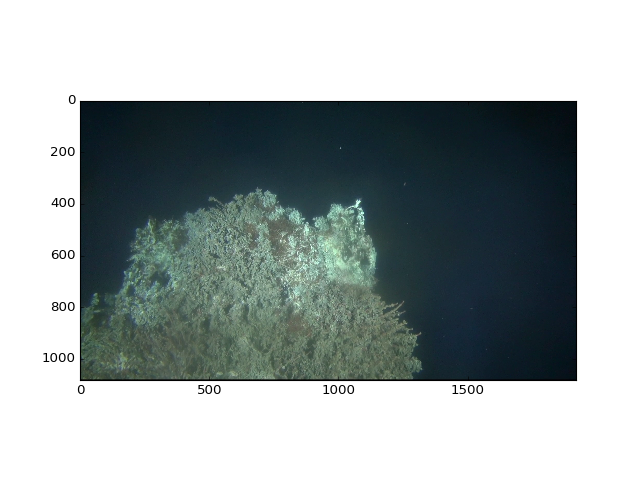

In [16]:
plt.figure()
fig = plt.gcf()
fig.show()
fig.canvas.draw()


frames_bdry = []
for i in np.arange(0,24,3):
    if i != 15:
        filename = 'opendap_hyrax_large_format_RS03ASHS-PN03B-06-CAMHDA301_2016_01_01_CAMHDA301-20160101T'+str(i).zfill(2)+'0000Z.mp4'
        vid = imageio.get_reader(filename,  'ffmpeg')
        # nums = [2760,8160,13200]
        num = 13200
        num = 8160
        #for num in nums:
        image = vid.get_data(num)
        frames_bdry.append(image)

    plt.imshow(image)
    fig.canvas.draw()
    
    
 

##### There is jitter! We will need to adjust for it if we are interested in the growth of the structure.  

##### But let's just look at the boundaries. Here is some rough extraction based on simple tresholding:

In [17]:
# from skimage import feature
# edges = feature.canny(frames[0][:,:,0], sigma=3)
from skimage.segmentation import find_boundaries


<IPython.core.display.Javascript object>


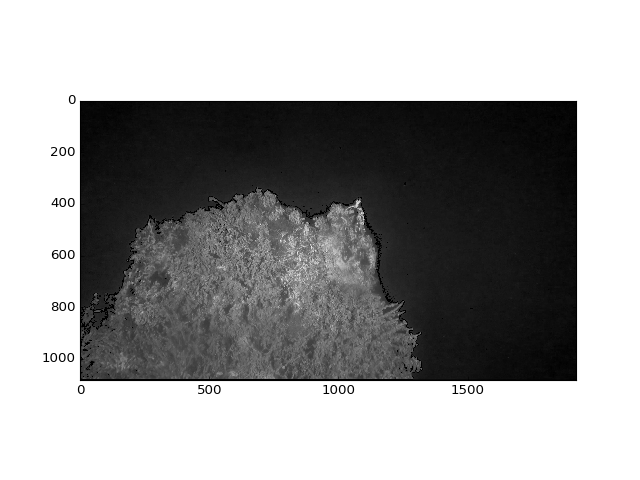

In [18]:
plt.figure()
fig = plt.gcf()
fig.show()
fig.canvas.draw()

for frame in frames_bdry:
    binary = frame[:,:,0]<50
    # plt.imshow(edges,cmap = 'gray')
    bdry = find_boundaries(binary, connectivity = 5)
    plt.imshow((1 - bdry)*frame[:,:,0], cmap = 'gray')
    fig.show()
    fig.canvas.draw()

In [20]:
# TODO
# 1) plot in color
# 2) plot contours for boundaries
# 3) registration


In [31]:
# extract the dimensions
print('Number of frames: '+ str(len(frames_bdry)))
print('Image size: '+ str(frames_bdry[0].shape))
nofFrames = len(frames_bdry)
dim1  = frames_bdry[0].shape[0]
dim2 = frames_bdry[0].shape[1]


Number of frames: 7
Image size: (1080, 1920, 3)


### Processing slices at 7:20

<IPython.core.display.Javascript object>


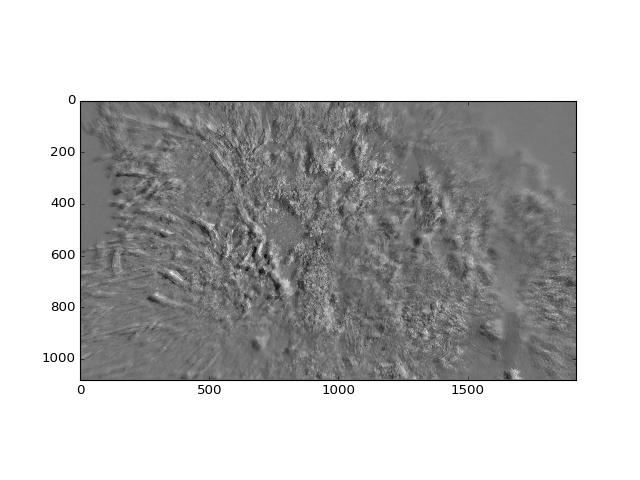

In [32]:
plt.figure()
fig = plt.gcf()
fig.show()
fig.canvas.draw()


frames_13200 = []
for i in np.arange(0,24,3):
    if i != 15:
        filename = 'opendap_hyrax_large_format_RS03ASHS-PN03B-06-CAMHDA301_2016_01_01_CAMHDA301-20160101T'+str(i).zfill(2)+'0000Z.mp4'
        vid = imageio.get_reader(filename,  'ffmpeg')
        # nums = [2760,8160,13200]
        num = 13200
        image = vid.get_data(num)
        frames_13200.append(image)

    plt.imshow(image)
    fig.canvas.draw()
    
    

In [33]:
video = np.array(frames_13200)

### PCA Decomposition

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components = nofFrames)

In [36]:
pca.fit(np.reshape(video,(nofFrames,dim1*dim2*3)))

PCA(copy=True, n_components=7, whiten=False)

In [37]:
pca.components_.shape

(7, 6220800)

In [38]:
modes = np.reshape(pca.components_,(nofFrames,dim1,dim2,3))

In [39]:
pca.components_.shape

(7, 6220800)

In [40]:
modes.shape

(7, 1080, 1920, 3)

In [41]:
plt.imshow((modes[0,:,:,2]+0.2)*255,cmap = 'gray')

<IPython.core.display.Javascript object>


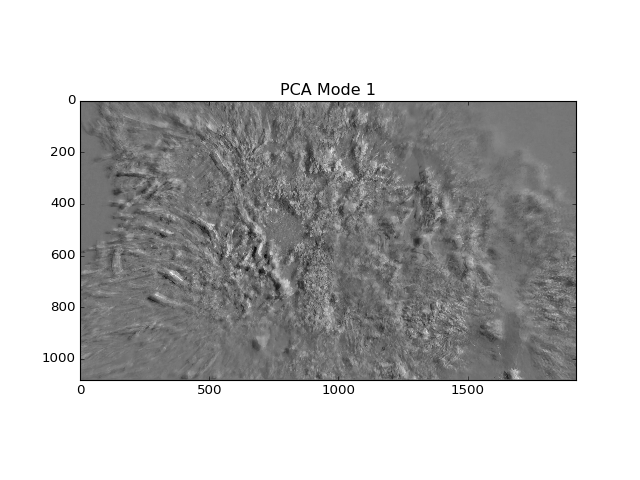

<IPython.core.display.Javascript object>


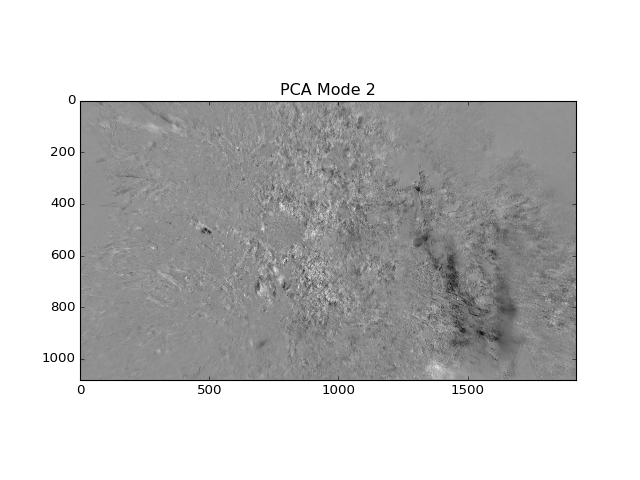

<IPython.core.display.Javascript object>


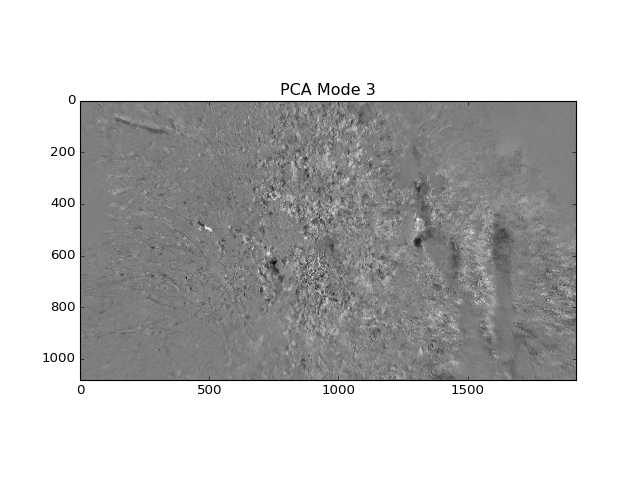

<IPython.core.display.Javascript object>


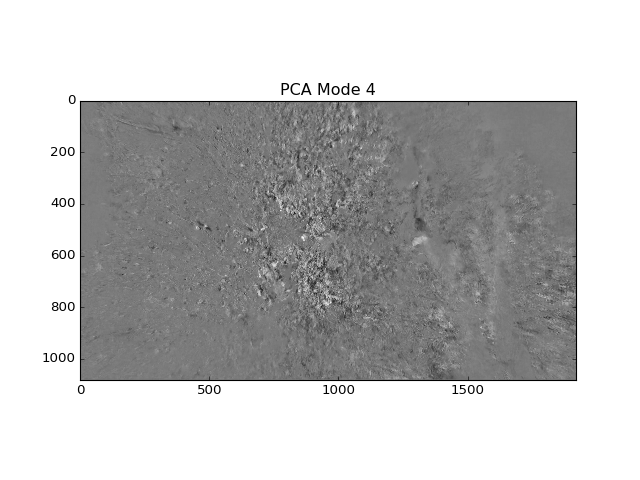

<IPython.core.display.Javascript object>


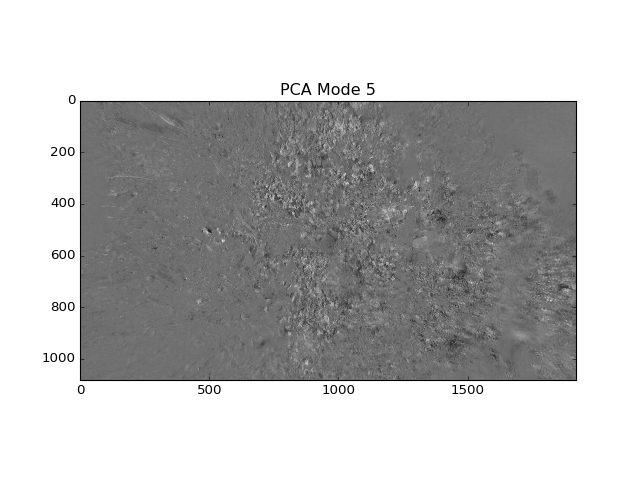

<IPython.core.display.Javascript object>


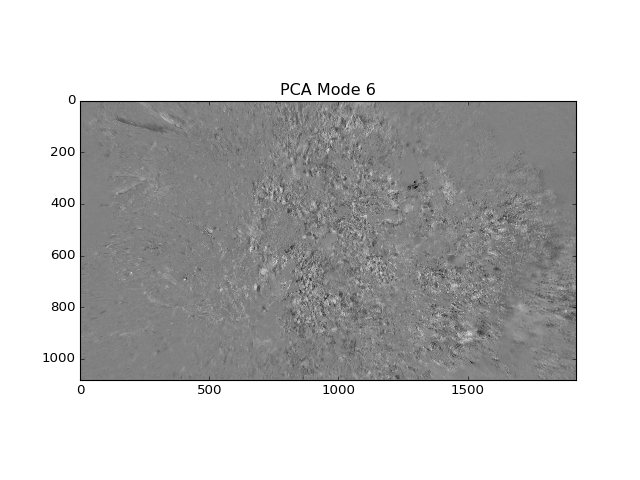

<IPython.core.display.Javascript object>


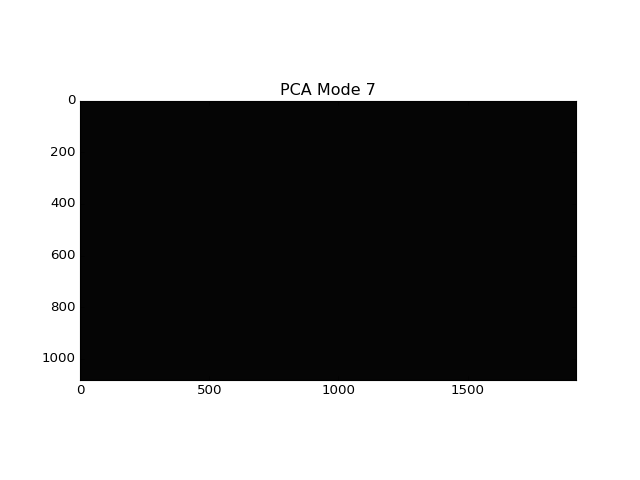

In [42]:
for m in range(modes.shape[0]):
    plt.figure()
    plt.imshow((modes[m,:,:,2]),cmap = 'gray')
    plt.title('PCA Mode '+  str(m+1))

In [43]:
np.min(modes)

-0.18045789825583641

In [44]:
np.min(modes[6,:])

-0.18045789825583641

In [45]:
np.max(modes[6,:,:,:])

0.98152375923519963

In [46]:
np.max(modes[6])

0.98152375923519963

### Processing a specific video

In [ ]:
# just reading sparse frames:
filename = 'opendap_hyrax_large_format_RS03ASHS-PN03B-06-CAMHDA301_2016_01_01_CAMHDA301-20160101T210000Z.mp4'

In [ ]:
vid = imageio.get_reader(filename, 'ffmpeg')
# does it show a different length?
print(len(vid))
nums = np.arange(0,len(vid),100)
frames = []
values = []
im_prev = np.zeros((dim1,dim2,3))

fig = plt.figure()
fig.show()
fig.canvas.draw()

nums = list(np.arange(2000,3000,1))
for num in nums:
    im = vid.get_data(num)
    # plt.imshow(im)
    # plt.title('Image frame ' + str(num))
        
    # fig.show()
    #fig.canvas.draw()

#for i,im in enumerate(vid[3000:3100]):
    # plt.imshow(im)
    # plt.title('Image frame ' + str(i))
    # fig.show()
    # fig.canvas.draw()
    
     
    # values.append(np.sum(np.abs(im)))
    
    # store the absolute difference between the images
    diff = np.sum(np.abs(im - im_prev))
    im_prev = im
    frames.append(im)
    values.append(diff)
    

In [ ]:
plt.figure()
plt.plot(values)
plt.show()

In [ ]:
# calculate deviation from moving average:
l = []
for i in range(1,len(frames) - 2):
    mean = (frames[i]+frames[i-1]+frames[i+1])/3.
    var = (np.sum(np.abs(frames[i]-mean)) + np.sum(np.abs(frames[i-1]-mean)) + np.sum(np.abs(frames[i+1]-mean)))/3.
    l.append(var)
    

In [ ]:
video = np.array(frames)

video_flat = np.reshape()

In [ ]:
plt.figure()
plt.plot(l)
plt.show()

In [ ]:
fig = plt.figure()
fig.show()
fig.canvas.draw()
for i in range(len(frames)):
    plt.imshow(frames[i])
    plt.title('Frame '+str(2000+i))
    fig.show()
    fig.canvas.draw()
    

#### OpenCV test

In [ ]:
import cv2

In [ ]:
#### Need to link to ffmpeg!!!!!

In [ ]:
cap = cv2.VideoCapture("/home/val/MEGA/eScienceWork/projects/OOIVideos/OOIVideos/opendap_hyrax_large_format_RS03ASHS-PN03B-06-CAMHDA301_2016_01_01_CAMHDA301-20160101T210000Z.mp4")
cap.grab()

In [ ]:
cap = cv2.VideoCapture(0)

In [ ]:
print(cap.grab())
success,image = cap.read()
print(success)

In [ ]:
#video.open()
video = []
success = 1
while success:
    success, image = cap.read()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    video.append(gray)
    #cv2.imshow('frame',gray)

In [ ]:
len(video)

In [ ]:
success, image = cap.read()

In [ ]:
print(success)

In [ ]:
cap.isOpened()

In [ ]:
plt.figure()
plt.imshow(gray)
plt.show()

In [ ]:
print(len(values))
# plt.figure(figsize = (16,6))
plt.plot(np.array(values[1500:1880]))
plt.show()

In [ ]:
# plt.imshow(frames[1250])

plt.figure()
fig = plt.gcf()
fig.show()
fig.canvas.draw()

for i in range(200):
    plt.imshow(vid.get_data(1500+i))
    plt.title(str(1500+i))
    fig.show()
    fig.canvas.draw()
    
    #plt.pause(1)


In [ ]:
# for the flat regions: detect what is moving in the flat regions

# 1) create a mask based on a threshold of values
idx = (values>10000)
# for each chunk of ones: apply 

In [ ]:
len(vid)

In [ ]:
video = np.aray(frames)
res = np.sum(np.abs(video[1:,:,:,:] -video[:video.shape[0]-1,:,:,:]))

### Fetching More Movies

In [ ]:
cd ~/MEGA/eScienceWork/projects/OOIVideos

In [ ]:
import sys
sys.path.append('~/MEGA/eScienceWork/projects/OOIVideos')

In [ ]:
import fetchmovies as fm

In [ ]:
url = "http://opendap-devel.ooi.rutgers.edu:8080/opendap/hyrax/large_format/RS03ASHS-PN03B-06-CAMHDA301/2016/catalog.xml"

mylist = fm.download(url,'test.mp4')

In [ ]:
for item in mylist:
    print item

In [ ]:
import imp
# imp.load_source('fm','fetchmovies.py')
import fetchmovies as fm
reload(fm)